# Take Home Project

## Import Libraries

In [198]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  



## Loading Data

In [201]:

# Load the dataset
training_data_path = 'training_loan_data.csv'
train_data = pd.read_csv(training_data_path, header=None, encoding='latin1')

# Set the second row as column headers
train_data.columns = train_data.iloc[1]

# Drop the first two rows
train_data = train_data[2:].reset_index(drop=True)

train_data.head()

/var/folders/17/m9zbjm4x4x77jk_3503c2s700000gn/T/ipykernel_21097/53417722.py:3: DtypeWarning: Columns (0,1,2,7,10,11,12,13,14,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(training_data_path, header=None, encoding='latin1')


1,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056,7550,36 months,16.24%,3 years,RENT,28000,NaN,debt_consolidation,...,0,17,72%,4000,NaN,3828.953801,5759,1,99,0
1,10000002,12002921,27050,36 months,10.99%,10+ years,OWN,55000,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0,8,61.20%,35700,NaN,34359.94073,114834,1,353,0
2,10000003,11983096,12000,36 months,10.99%,4 years,RENT,60000,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1,3,24%,18100,NaN,16416.61776,7137,1,157,0
3,10000004,12003142,28000,36 months,7.62%,5 years,MORTGAGE,325000,NaN,debt_consolidation,...,1,3,54.60%,42200,NaN,38014.14976,799592,1,365,0
4,10000005,11993233,12000,36 months,13.53%,10+ years,RENT,40000,NaN,debt_consolidation,...,0,17,68.80%,7000,53,6471.462236,13605,1,157,0


In [203]:
#shape of the training data
train_data.shape

(199121, 23)

In [205]:
# Inspect the dataset
print("Initial Dataset Info:")
train_data.info()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   id                           199121 non-null  object
 1   member_id                    189457 non-null  object
 2   loan_amnt                    199121 non-null  object
 3   term                         189457 non-null  object
 4   int_rate                     189457 non-null  object
 5   emp_length                   181531 non-null  object
 6   home_ownership               189457 non-null  object
 7   annual_inc                   189457 non-null  object
 8   desc                         82004 non-null   object
 9   purpose                      189457 non-null  object
 10  percent_bc_gt_75             180419 non-null  object
 11  bc_util                      180333 non-null  object
 12  dti                          189457 non-null  obje

In [207]:
train_data['bad_flag'].unique()

array(['0', '1', 0, 1, nan], dtype=object)

In [209]:
# Clean the 'bad_flag' column
def clean_bad_flag(value):
    if pd.isnull(value):
        return np.nan  # Keep NaN for now to handle missing separately
    try:
        return int(float(value))  # Handle strings, floats, and integers uniformly
    except ValueError:
        return np.nan  # Handle invalid values gracefully

train_data['bad_flag'] = train_data['bad_flag'].apply(clean_bad_flag)

# Check for any remaining issues
print("Unique values in 'bad_flag' after cleaning:", train_data['bad_flag'].unique())



Unique values in 'bad_flag' after cleaning: [ 0.  1. nan]


In [211]:
# def preprocess_data(df, is_test=False):
#     """
#     Cleans and preprocesses the dataset for modeling.
    
#     Parameters:
#         df (pd.DataFrame): The raw dataset to preprocess.
#         is_test (bool): Flag indicating if the dataset is a test set (default: False).
    
#     Returns:
#         pd.DataFrame: The cleaned and preprocessed dataset.
#     """
#     # Drop unnecessary columns
#     columns_to_drop = ['id', 'member_id', 'desc', 'mths_since_last_major_derog', 'application_approved_flag']
#     if is_test:
#         columns_to_drop.append('bad_flag')  # Remove the target column for test data
#     df = df.drop(columns=columns_to_drop, errors='ignore')

#     # Convert 'emp_length' to numeric
#     def clean_emp_length(value):
#         if pd.isnull(value) or value == "n/a":
#             return np.nan
#         elif "<" in value:
#             return 0
#         elif "10+" in value:
#             return 10
#         else:
#             return int(value.split()[0])

#     if 'emp_length' in df.columns:
#         df['emp_length'] = df['emp_length'].apply(clean_emp_length)

#     # Clean and convert 'bc_util' (remove % and convert to float)
#     if 'bc_util' in df.columns:
#         df['bc_util'] = df['bc_util'].str.replace('%', '', regex=False).astype(float)

#     # Convert 'mths_since_recent_inq' to numeric
#     if 'mths_since_recent_inq' in df.columns:
#         df['mths_since_recent_inq'] = pd.to_numeric(df['mths_since_recent_inq'], errors='coerce')

#     # Clean and convert 'int_rate' and 'percent_bc_gt_75'
#     for col in ['int_rate', 'revol_util']:
#         if col in df.columns:
#             df[col] = df[col].str.replace('%', '', regex=False).astype(float)

#     # Convert numeric columns to float
#     numeric_columns = [
#         'loan_amnt', 'int_rate', 'annual_inc', 'dti', 
#         'inq_last_6mths', 'bc_util', 'total_bc_limit',
#         'tot_hi_cred_lim', 'tot_cur_bal', 'internal_score', 'percent_bc_gt_75',
#         'mths_since_recent_inq'
#     ]
#     for col in numeric_columns:
#         if col in df.columns:
#             df[col] = pd.to_numeric(df[col], errors='coerce')

#     # Convert categorical columns to 'category'
#     categorical_columns = ['term', 'home_ownership', 'purpose']
#     if not is_test:
#         categorical_columns.append('bad_flag')  # Include the target column for training data
#     for col in categorical_columns:
#         if col in df.columns:
#             df[col] = df[col].astype('category')

#     # Handle missing values
#     # Numeric columns: Fill missing values with median
#     for col in numeric_columns:
#         if col in df.columns:
#             df[col] = df[col].fillna(df[col].median())

#     # Categorical columns: Fill missing values with "Unknown"
#     for col in categorical_columns:
#         if col in df.columns:
#             df[col] = df[col].cat.add_categories("Unknown").fillna("Unknown")

#     return df


In [213]:
def preprocess_data_v2(df, is_test=False):
    """
    Cleans and preprocesses the dataset for modeling, addressing specific observations.
    
    Parameters:
        df (pd.DataFrame): The raw dataset to preprocess.
        is_test (bool): Flag indicating if the dataset is a test set (default: False).
    
    Returns:
        pd.DataFrame: The cleaned and preprocessed dataset.
    """
    # Drop unnecessary columns
    columns_to_drop = ['id', 'member_id', 'desc', 'mths_since_last_major_derog', 'application_approved_flag']
    if is_test:
        columns_to_drop.append('bad_flag')  # Remove the target column for test data
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Convert 'emp_length' to numeric
    def clean_emp_length(value):
        if pd.isnull(value) or value == "n/a":
            return np.nan
        elif "<" in value:
            return 0
        elif "10+" in value:
            return 10
        else:
            try:
                return int(value.split()[0])
            except:
                return np.nan

    if 'emp_length' in df.columns:
        df['emp_length'] = df['emp_length'].apply(clean_emp_length)

    # Clean and convert 'bc_util', 'revol_util', and 'int_rate' (remove % and convert to float)
    for col in ['bc_util', 'revol_util', 'int_rate']:
        if col in df.columns:
            df[col] = df[col].str.replace('%', '', regex=False).astype(float)

    # Convert 'mths_since_recent_inq' to numeric
    if 'mths_since_recent_inq' in df.columns:
        df['mths_since_recent_inq'] = pd.to_numeric(df['mths_since_recent_inq'], errors='coerce')

    # Convert numeric columns to float
    numeric_columns = [
        'loan_amnt', 'int_rate', 'annual_inc', 'dti', 
        'inq_last_6mths', 'bc_util', 'total_bc_limit',
        'tot_hi_cred_lim', 'tot_cur_bal', 'internal_score', 'percent_bc_gt_75',
        'mths_since_recent_inq', 'revol_util'
    ]
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Convert categorical columns to 'category'
    categorical_columns = ['term', 'home_ownership', 'purpose']
    if not is_test:
        categorical_columns.append('bad_flag')  # Include the target column for training data
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].astype('category')

    # Handle missing values
    # Numeric columns: Fill missing values with median
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # Categorical columns: Fill missing values with "Unknown"
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].cat.add_categories("Unknown").fillna("Unknown")

    return df

# Apply the updated preprocessing function
train_data_cleaned_v2 = preprocess_data_v2(train_data)
print(train_data_cleaned_v2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   loan_amnt              199121 non-null  int64   
 1   term                   199121 non-null  category
 2   int_rate               199121 non-null  float64 
 3   emp_length             181531 non-null  float64 
 4   home_ownership         199121 non-null  category
 5   annual_inc             199121 non-null  float64 
 6   purpose                199121 non-null  category
 7   percent_bc_gt_75       199121 non-null  float64 
 8   bc_util                199121 non-null  float64 
 9   dti                    199121 non-null  float64 
 10  inq_last_6mths         199121 non-null  float64 
 11  mths_since_recent_inq  199121 non-null  float64 
 12  revol_util             199121 non-null  float64 
 13  total_bc_limit         199121 non-null  float64 
 14  tot_hi_cred_lim     

In [214]:
train_data_cleaned.head()

1,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag
0,7550,36 months,16.24,3.0,RENT,28000.0,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72.0,4000.0,3828.953801,5759.0,99,0.0
1,27050,36 months,10.99,10.0,OWN,55000.0,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,34359.940730,114834.0,353,0.0
2,12000,36 months,10.99,4.0,RENT,60000.0,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24.0,18100.0,16416.617760,7137.0,157,0.0
3,28000,36 months,7.62,5.0,MORTGAGE,325000.0,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,38014.149760,799592.0,365,0.0
4,12000,36 months,13.53,10.0,RENT,40000.0,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.8,7000.0,6471.462236,13605.0,157,0.0


# Plan for EDA:
Target Variable Analysis:

Examine the distribution of bad_flag to understand class balance.
Numerical Feature Analysis:

Check distributions and potential outliers using histograms.
Analyze correlations between numerical features and bad_flag.
Categorical Feature Analysis:

Visualize the relationship between categorical features and bad_flag.

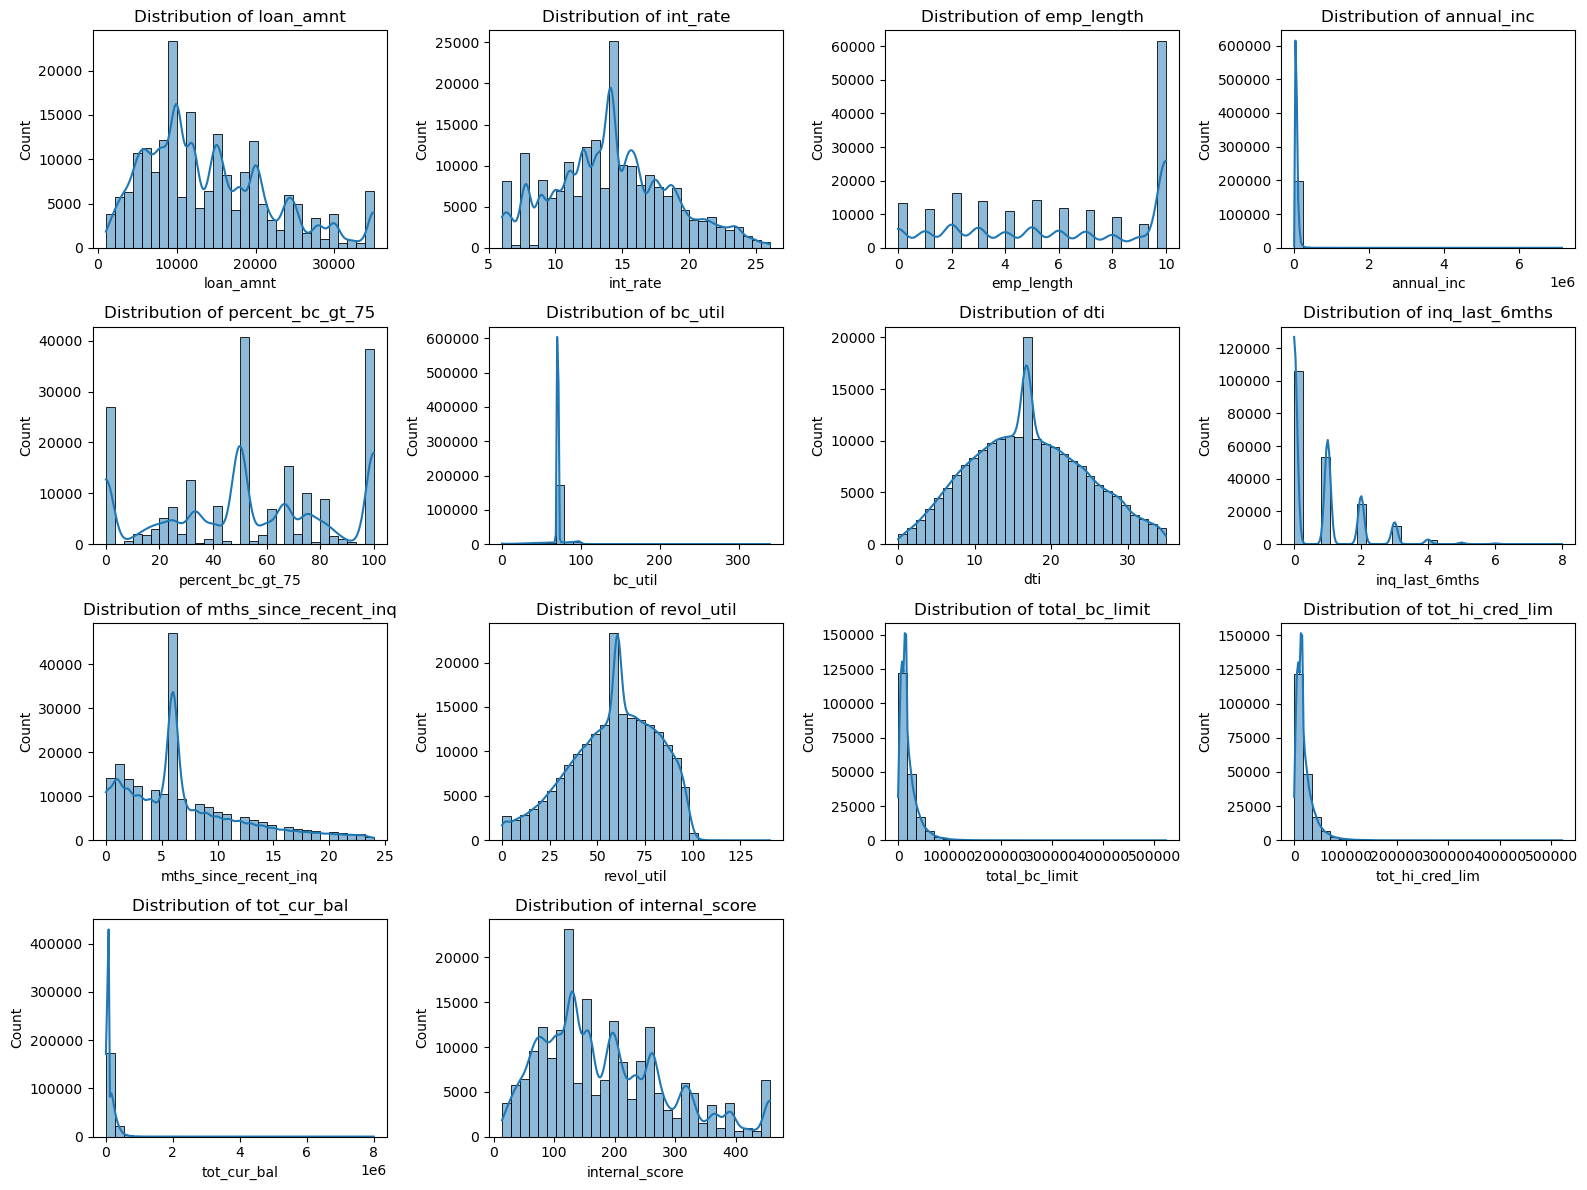

In [218]:
# 1. Plot distributions of numeric features
numeric_columns = train_data_cleaned_v2.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_data_cleaned_v2[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

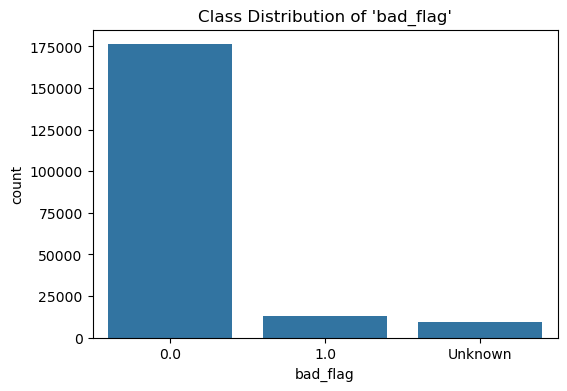

In [219]:
# 2. Analyze the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data_cleaned_v2, x='bad_flag')
plt.title("Class Distribution of 'bad_flag'")
plt.show()

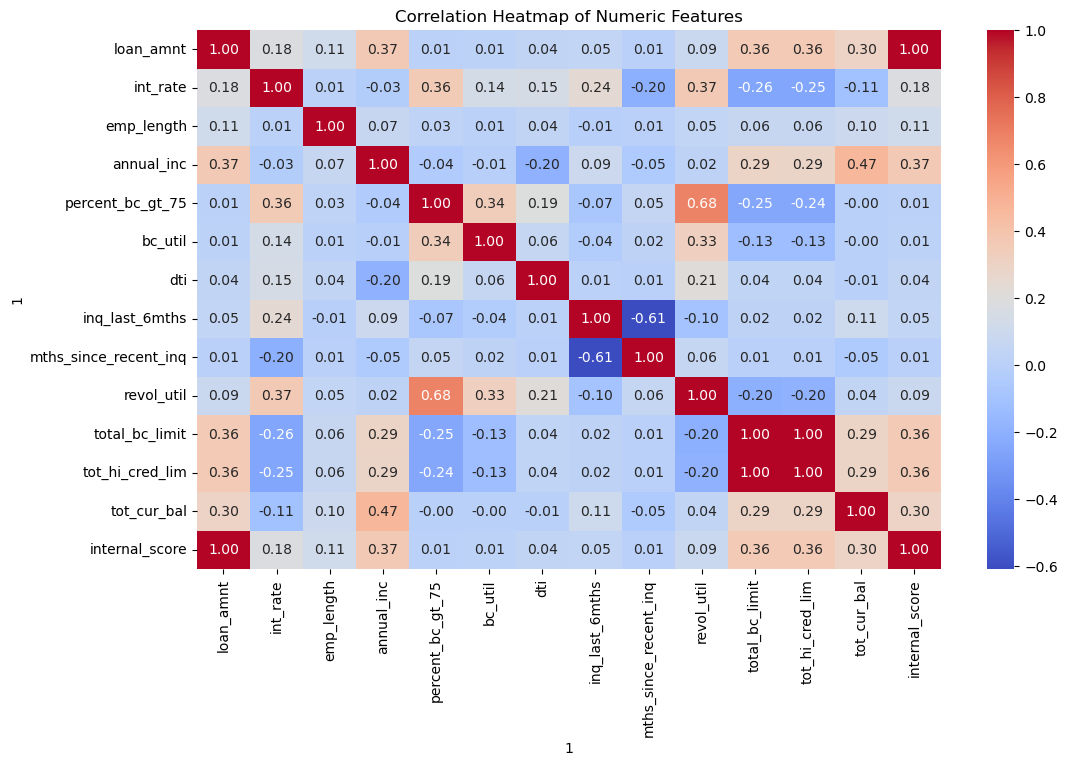

In [220]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 7))
correlation_matrix = train_data_cleaned_v2[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

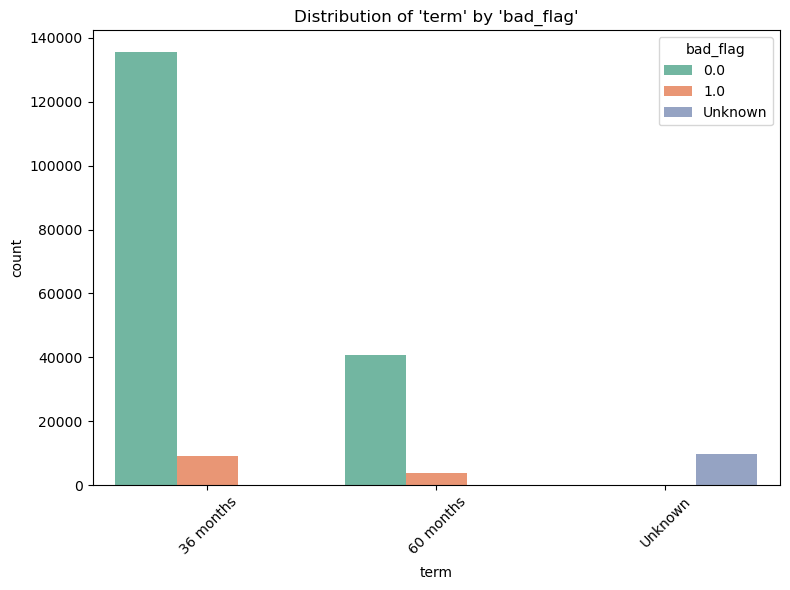

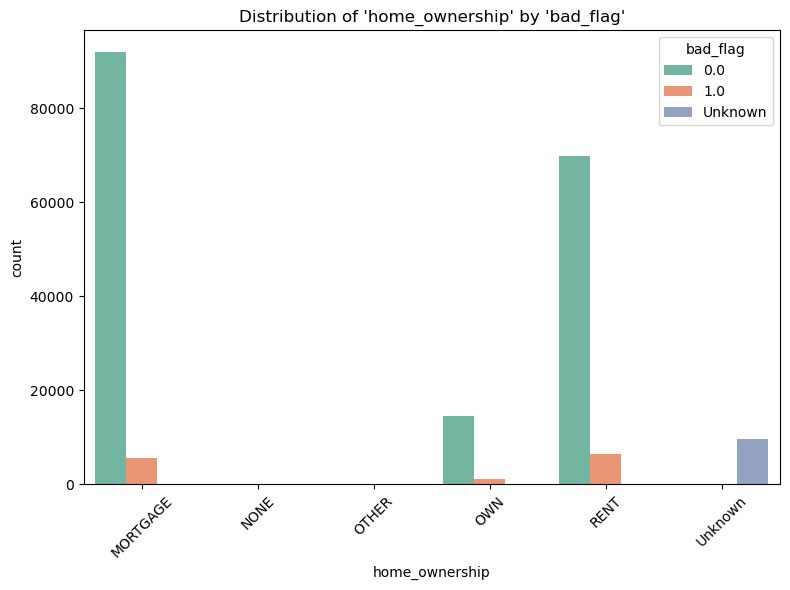

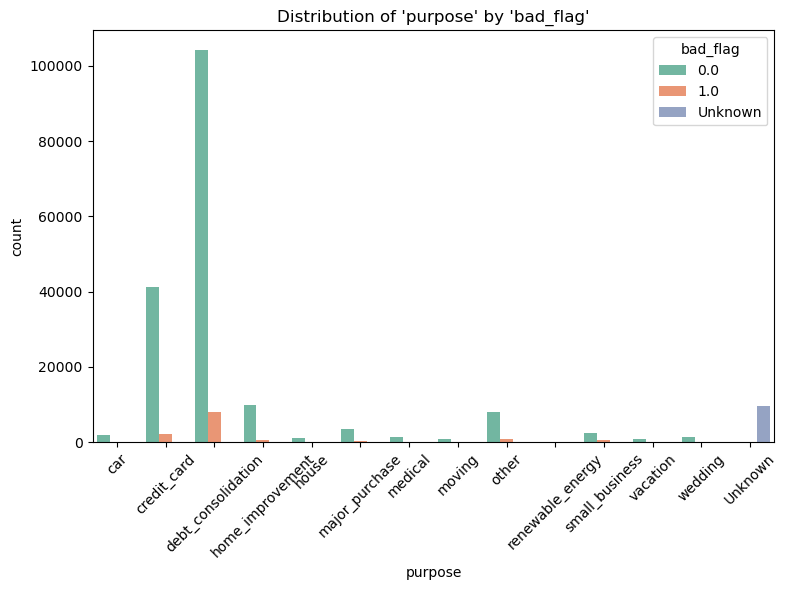

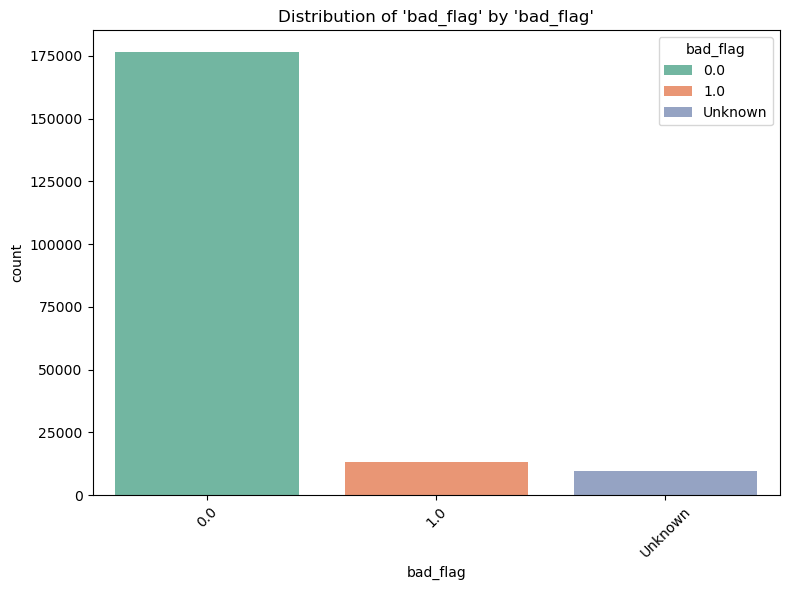

In [221]:
# 4. Categorical feature analysis
categorical_columns = train_data_cleaned_v2.select_dtypes(include=['category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_data_cleaned_v2, x=col, hue='bad_flag', palette='Set2')
    plt.title(f"Distribution of '{col}' by 'bad_flag'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Numeric Feature Distributions:

Features like loan_amnt, int_rate, and annual_inc exhibit reasonable distributions.
Some features, like bc_util and revol_util, show skewness or concentration at specific values.
Class Balance:

The target variable bad_flag is imbalanced, with most loans classified as 0.0 (not bad loans).
A small fraction is classified as 1.0 (bad loans), with a negligible number as Unknown.
Correlations:

Some numeric features, such as total_bc_limit and tot_hi_cred_lim, exhibit moderate correlations with loan_amnt.
The revol_util feature correlates moderately with percent_bc_gt_75.
Categorical Features:

Categories like term and purpose have distributions skewed toward specific values (36 months and debt_consolidation, respectively).
home_ownership is dominated by MORTGAGE and RENT.


Key Observations:
loan_amnt:

Distribution peaks around $10,000–$15,000, with fewer higher loan amounts.
Indicates loans are primarily of small to medium sizes.
int_rate (Interest Rate):

A bell-shaped distribution, with most values clustered around 10–15%.
Suggests interest rates are fairly consistent.
annual_inc (Annual Income):

Extremely right-skewed; most incomes are concentrated at lower values.
Outliers (high-income borrowers) may need to be handled.
dti (Debt-to-Income Ratio):

Appears normally distributed, centered around 20.
Indicates most borrowers have moderate debt relative to income.
bc_util & revol_util (Credit Utilization):

bc_util has some high outliers, but most values are clustered under 100.
revol_util is slightly right-skewed, with most values below 50.
total_bc_limit & tot_hi_cred_lim (Credit Limits):

Strongly right-skewed distributions with very high credit limits for a few borrowers.
Outliers dominate these features.
internal_score:

Evenly distributed between 100 and 400, which might represent a scoring model used internally.
percent_bc_gt_75:

Discretized, with spikes at specific values (e.g., 0, 25, 50, 100).
Suggests it may be a feature with meaningful thresholds.
mths_since_recent_inq:

Skewed towards smaller values, meaning most borrowers had recent inquiries in the last 0–5 months.
Insights:
Skewed Features:

Features like annual_inc, total_bc_limit, and tot_hi_cred_lim are highly skewed.
You might consider log transformations or clipping outliers for these features.
Outliers:

Several features exhibit outliers, which could influence model performance.
Investigate whether to cap or remove extreme values.
Scaling:

Features like loan_amnt and dti have moderate ranges, but others (e.g., annual_inc, tot_cur_bal) span several orders of magnitude.
Normalization or standardization is necessary for machine learning models.


Key Observations:
bad_flag Correlations:

Most features have weak correlations with bad_flag, as shown in the row corresponding to bad_flag.
The strongest (though still weak) correlations:
loan_amnt: Negative correlation of -0.13.
int_rate: Slight positive correlation of 0.05.
Highly Correlated Features (Feature Interactions):

total_bc_limit, tot_hi_cred_lim, and tot_cur_bal:
These features are highly correlated with each other (correlations near 0.36 to 1.00).
Indicates potential redundancy or multicollinearity.
revol_util and bc_util:
Moderate positive correlation (0.33), suggesting they measure similar aspects of credit utilization.
Negative Correlation:

inq_last_6mths and mths_since_recent_inq:
Strong negative correlation of -0.61, as expected (recent inquiries are inversely related to months since the last inquiry).
Insights for Feature Engineering:
Multicollinearity:

Features like total_bc_limit, tot_hi_cred_lim, and tot_cur_bal might introduce multicollinearity in linear models.
Consider dimensionality reduction (e.g., PCA) or using only one of these features.
Interaction Features:

Explore interaction terms between moderately correlated features (e.g., revol_util × bc_util) to capture non-linear relationships.
Weak Correlation with bad_flag:

Weak correlations suggest linear models may struggle to predict bad_flag.
Non-linear models (e.g., Random Forest, XGBoost) may better capture underlying patterns.

1. term vs. bad_flag:
Observation:
Loans with a 36-month term are significantly more common than those with a 60-month term.
The proportion of bad_flag = 1 (bad loans) is slightly higher for 60-month loans compared to 36-month loans.
Insight:
Longer loan terms may increase the likelihood of defaults, possibly due to prolonged financial risks.
Action:
Consider including term as a feature, as it might provide predictive value for bad_flag.
2. home_ownership vs. bad_flag:
Observation:
Borrowers with "Mortgage" and "Rent" dominate the dataset.
The proportion of bad_flag = 1 is higher for "Rent" compared to "Mortgage" and "Own."
Insight:
Renters might have less financial stability, which could explain the higher default rate.
Action:
home_ownership is an important categorical feature and should be retained for predictive modeling.
3. purpose vs. bad_flag:
Observation:
The majority of loans are for "debt_consolidation," followed by "credit_card" and "home_improvement."
"Debt_consolidation" has a higher proportion of defaults compared to other purposes.
Insight:
Borrowers consolidating debt might already be in financial distress, increasing their likelihood of default.
Action:
purpose appears to provide meaningful information about loan risk and should be included in the model.


In [226]:
def clean_unknowns_v2(df):
    """
    Handles 'Unknown' values in categorical columns of the dataset reliably using .loc.
    
    Parameters:
        df (pd.DataFrame): The dataset to process.
    
    Returns:
        pd.DataFrame: The cleaned dataset.
    """
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['category']).columns

    # Handle 'Unknown' values
    for col in categorical_columns:
        if 'Unknown' in df[col].cat.categories:
            print(f"Handling 'Unknown' in column: {col}")
            
            # Drop rows with 'Unknown'
            df = df[df[col] != 'Unknown'].copy()
            
            # Drop 'Unknown' from categories
            df[col] = df[col].cat.remove_categories(['Unknown'])

    return df

# Reapply the updated cleaning function to the training dataset
train_data_cleaned_v4 = clean_unknowns_v2(train_data_cleaned_v3)

# Verify the cleaned dataset
print("After Rechecking 'Unknown':")
for col in train_data_cleaned_v4.select_dtypes(include=['category']).columns:
    print(f"Unique values in {col}: {train_data_cleaned_v4[col].unique()}")



After Rechecking 'Unknown':
Unique values in term: [' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']
Unique values in home_ownership: ['RENT', 'OWN', 'MORTGAGE', 'NONE', 'OTHER']
Categories (5, object): ['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']
Unique values in purpose: ['debt_consolidation', 'home_improvement', 'credit_card', 'other', 'major_purchase', ..., 'medical', 'car', 'vacation', 'renewable_energy', 'wedding']
Length: 13
Categories (13, object): ['car', 'credit_card', 'debt_consolidation', 'home_improvement', ..., 'renewable_energy', 'small_business', 'vacation', 'wedding']
Unique values in bad_flag: [0.0, 1.0]
Categories (2, object): [0.0, 1.0]


## Handling Class Imbalance

In [231]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Encode categorical features using OneHotEncoder
categorical_columns = X.select_dtypes(include=['category']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
encoded_categorical = pd.DataFrame(encoder.fit_transform(X[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and merge with encoded data
X_numeric = X.drop(columns=categorical_columns).reset_index(drop=True)
X_encoded = pd.concat([X_numeric, encoded_categorical], axis=1)

# Apply SMOTE to the encoded dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y)

# Check class distribution after SMOTE
print("Class Distribution After SMOTE:")
print(y_balanced.value_counts())

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
print(f"Training Data Shape: {X_train.shape}, Validation Data Shape: {X_val.shape}")


Class Distribution After SMOTE:
bad_flag
0.0    176329
1.0    176329
Name: count, dtype: int64
Training Data Shape: (282126, 31), Validation Data Shape: (70532, 31)


In [234]:
# Check unique values in the `bad_flag` column
print("Unique values in 'bad_flag' before SMOTE:", y.unique())

Unique values in 'bad_flag' before SMOTE: [0. 1.]


In [237]:
# # Ensure all features are numeric (after one-hot encoding and scaling)
# X_resampled = X_resampled.apply(pd.to_numeric, errors='coerce')

# # Check if all columns are numeric now
# print(X_resampled.dtypes)


## Feature Scaling

In [240]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# (Optional) Transform the test dataset once it's preprocessed
# test_data_scaled = scaler.transform(test_data_encoded)

# Convert scaled data back to DataFrames (optional, for interpretability)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)

# Verify scaled training data
print("Scaled Training Data - Mean:", X_train_scaled.mean(axis=0))
print("Scaled Training Data - Std Dev:", X_train_scaled.std(axis=0))


Scaled Training Data - Mean: [ 1.83600822e-17 -2.30697329e-17  1.98006812e-16 -2.73864929e-16
  3.05371737e-16 -2.91596638e-15  1.12943468e-15  3.15823636e-17
  4.09223313e-16  1.69270387e-16  2.94466503e-16  2.16291338e-16
  1.24314630e-16  5.10254136e-17  3.26023681e-17  4.30668594e-18
 -1.32474667e-17 -9.65352469e-17  3.49068229e-17  3.71231291e-17
 -1.74937079e-16  1.01824159e-16  3.52594171e-17 -5.01187428e-18
  6.06461974e-17 -3.97424001e-17  2.65704893e-17  1.91911970e-17
 -6.31647272e-17 -2.66964158e-18  1.41037668e-18]
Scaled Training Data - Std Dev: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


In [243]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert scaled data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# Create PyTorch DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Define the Neural Network
class LoanPredictionNN(nn.Module):
    def __init__(self, input_dim):
        super(LoanPredictionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model
input_dim = X_train_scaled.shape[1]
model = LoanPredictionNN(input_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation Loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, "
              f"Val Loss: {val_loss/len(val_loader):.4f}")

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20)


Epoch 1/20, Train Loss: 0.4314, Val Loss: 0.3800
Epoch 2/20, Train Loss: 0.3479, Val Loss: 0.3308
Epoch 3/20, Train Loss: 0.3215, Val Loss: 0.3064
Epoch 4/20, Train Loss: 0.3106, Val Loss: 0.3034
Epoch 5/20, Train Loss: 0.3011, Val Loss: 0.3036
Epoch 6/20, Train Loss: 0.2897, Val Loss: 0.2861
Epoch 7/20, Train Loss: 0.2812, Val Loss: 0.2832
Epoch 8/20, Train Loss: 0.2763, Val Loss: 0.2784
Epoch 9/20, Train Loss: 0.2723, Val Loss: 0.2726
Epoch 10/20, Train Loss: 0.2659, Val Loss: 0.2684
Epoch 11/20, Train Loss: 0.2618, Val Loss: 0.2583
Epoch 12/20, Train Loss: 0.2589, Val Loss: 0.2628
Epoch 13/20, Train Loss: 0.2552, Val Loss: 0.2635
Epoch 14/20, Train Loss: 0.2527, Val Loss: 0.2518
Epoch 15/20, Train Loss: 0.2501, Val Loss: 0.2461
Epoch 16/20, Train Loss: 0.2482, Val Loss: 0.2464
Epoch 17/20, Train Loss: 0.2471, Val Loss: 0.2469
Epoch 18/20, Train Loss: 0.2456, Val Loss: 0.2553
Epoch 19/20, Train Loss: 0.2449, Val Loss: 0.2428
Epoch 20/20, Train Loss: 0.2490, Val Loss: 0.2446


In [244]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on validation set
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val_tensor).numpy()
    y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_val_tensor.numpy(), y_val_pred_binary)
precision = precision_score(y_val_tensor.numpy(), y_val_pred_binary)
recall = recall_score(y_val_tensor.numpy(), y_val_pred_binary)
f1 = f1_score(y_val_tensor.numpy(), y_val_pred_binary)
roc_auc = roc_auc_score(y_val_tensor.numpy(), y_val_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Validation Accuracy: 0.8965
Precision: 0.9406
Recall: 0.8463
F1-Score: 0.8910
AUC-ROC: 0.9517


Observations:
The high precision suggests the model is conservative when predicting bad loans (low false positives).
The recall of 0.8004 shows the model could be slightly improved to catch more bad loans (reduce false negatives).
The AUC-ROC of 0.9480 indicates strong overall performance and the ability to rank positive cases higher than negatives.

# Test Data

In [255]:
# Load the test dataset
test_data_path = 'testing_loan_data.csv'
test_data = pd.read_csv(test_data_path)
test_data.head()

/var/folders/17/m9zbjm4x4x77jk_3503c2s700000gn/T/ipykernel_21097/1786910402.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_data_path)


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,20000001,22419852,10000,36 months,22.15%,8 years,RENT,37000.0,NaN,debt_consolidation,...,1,3.0,73.10%,16200,NaN,14877.170280,36809,1,131,NaN
1,20000002,22349118,1400,36 months,18.24%,6 years,RENT,41000.0,NaN,other,...,0,9.0,11.50%,4000,NaN,4097.304770,19536,1,19,NaN
2,20000003,22398818,7000,36 months,12.49%,3 years,RENT,68900.0,NaN,debt_consolidation,...,0,11.0,48.10%,11900,80.0,12688.495160,241465,1,92,NaN
3,20000004,22419015,18000,60 months,16.29%,9 years,MORTGAGE,41000.0,NaN,debt_consolidation,...,1,0.0,38.10%,7600,73.0,7908.799817,179757,1,235,NaN
4,20000005,22388614,12000,36 months,12.99%,10+ years,MORTGAGE,64000.0,NaN,home_improvement,...,0,NaN,57.90%,21000,NaN,19378.561060,31953,1,157,NaN


In [257]:
def preprocess_data_v2(df, is_test=False):
    """
    Cleans and preprocesses the dataset for modeling, addressing specific observations.
    
    Parameters:
        df (pd.DataFrame): The raw dataset to preprocess.
        is_test (bool): Flag indicating if the dataset is a test set (default: False).
    
    Returns:
        pd.DataFrame: The cleaned and preprocessed dataset.
    """
    # Drop unnecessary columns
    columns_to_drop = ['id', 'member_id', 'desc', 'mths_since_last_major_derog', 'application_approved_flag']
    #if is_test:
    #    columns_to_drop.append('bad_flag')  # Remove the target column for test data
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    # Clean and convert 'emp_length'
    def clean_emp_length(value):
        if pd.isnull(value) or value == "n/a":
            return np.nan
        elif "<" in value:
            return 0
        elif "10+" in value:
            return 10
        else:
            try:
                return int(value.split()[0])
            except:
                return np.nan

    if 'emp_length' in df.columns:
        df['emp_length'] = df['emp_length'].apply(clean_emp_length)
    
    # Clean and convert percentage columns (handle non-string values gracefully)
    columns_to_process = ['bc_util', 'revol_util', 'int_rate']
    for col in columns_to_process:
        if col in df.columns:
            # Convert to string, remove '%', and convert back to float
            df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float)

    # Convert 'mths_since_recent_inq' to numeric
    if 'mths_since_recent_inq' in df.columns:
        df['mths_since_recent_inq'] = pd.to_numeric(df['mths_since_recent_inq'], errors='coerce')

    # Convert numeric columns to float
    numeric_columns = [
        'loan_amnt', 'int_rate', 'annual_inc', 'dti', 
        'inq_last_6mths', 'bc_util', 'total_bc_limit',
        'tot_hi_cred_lim', 'tot_cur_bal', 'internal_score', 'percent_bc_gt_75',
        'mths_since_recent_inq', 'revol_util'
    ]
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert categorical columns to 'category'
    categorical_columns = ['term', 'home_ownership', 'purpose']
    if not is_test:
        categorical_columns.append('bad_flag')  # Include the target column for training data
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Handle missing values
    # Numeric columns: Fill with median
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    # Categorical columns: Fill with "Unknown"
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].cat.add_categories("Unknown").fillna("Unknown")
    
    return df


In [259]:
test_data_cleaned1 = preprocess_data_v2(test_data, is_test=True)

In [261]:
test_data_cleaned1.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag
0,10000,36 months,22.15,8.0,RENT,37000.0,debt_consolidation,80.0,83.0,28.51,1,3.0,73.1,16200,14877.170280,36809,131,NaN
1,1400,36 months,18.24,6.0,RENT,41000.0,other,0.0,0.0,26.58,0,9.0,11.5,4000,4097.304770,19536,19,NaN
2,7000,36 months,12.49,3.0,RENT,68900.0,debt_consolidation,60.0,75.9,6.60,0,11.0,48.1,11900,12688.495160,241465,92,NaN
3,18000,60 months,16.29,9.0,MORTGAGE,41000.0,debt_consolidation,33.3,61.1,20.61,1,0.0,38.1,7600,7908.799817,179757,235,NaN
4,12000,36 months,12.99,10.0,MORTGAGE,64000.0,home_improvement,75.0,67.0,24.61,0,6.0,57.9,21000,19378.561060,31953,157,NaN


In [251]:
# Preprocess the test dataset
test_data_cleaned = preprocess_data_v2(test_data, is_test=True)
# Encode categorical features using the same encoder
test_categorical_encoded = pd.DataFrame(
    encoder.transform(test_data_cleaned[categorical_columns]), 
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Drop original categorical columns and merge with encoded data
test_numeric = test_data_cleaned.drop(columns=categorical_columns).reset_index(drop=True)
test_data_encoded = pd.concat([test_numeric, test_categorical_encoded], axis=1)

# Scale the test dataset using the same scaler
test_data_scaled = scaler.transform(test_data_encoded)

# Convert scaled data to PyTorch tensor
test_tensor = torch.tensor(test_data_scaled, dtype=torch.float32)

# Perform inference
model.eval()
with torch.no_grad():
    test_predictions = model(test_tensor).numpy()

# Convert probabilities to binary predictions
test_predictions_binary = (test_predictions > 0.5).astype(int)

# Save predictions to a CSV file
test_data_cleaned['bad_flag_predicted'] = test_predictions_binary
output_path = 'test_predictions.csv'
test_data_cleaned[['bad_flag_predicted']].to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")


Test predictions saved to test_predictions.csv


In [168]:
import pandas as pd

# Load the saved predictions
output_path = 'test_predictions.csv'
test_predictions_df = pd.read_csv(output_path)

# Display the first few rows of predictions
print("Preview of Test Predictions:")
print(test_predictions_df.head())

# Check the distribution of predicted labels
print("\nDistribution of Predicted Labels:")
print(test_predictions_df['bad_flag_predicted'].value_counts())


Preview of Test Predictions:
   bad_flag_predicted
0                   0
1                   0
2                   0
3                   0
4                   0

Distribution of Predicted Labels:
bad_flag_predicted
0    101759
1       746
Name: count, dtype: int64
